In [190]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [191]:
# Define dataset directory path
data_dir = "CGMacros"
# Load participant demographic and health data
bio_df = pd.read_csv(os.path.join(data_dir, "bio.csv"))
microbes_df = pd.read_csv(os.path.join(data_dir, "microbes.csv"))
gut_health_df = pd.read_csv(os.path.join(data_dir, "gut_health_test.csv"))



FileNotFoundError: [Errno 2] No such file or directory: 'CGMacros\\bio.csv'

In [ ]:
bio_df.head()

,subject,Age,Gender,BMI,Body weight,Height,Self-identify,A1c PDL (Lab),Fasting GLU - PDL (Lab),Insulin,...,LDL (Cal),VLDL (Cal),Cho/HDL Ratio,Collection time PDL (Lab),#1 Contour Fingerstick GLU,Time (t),#2 Contour Fingerstick GLU,Time (t).1,#3 Contour Fingerstick GLU,Time (t).2
0,1,27,M,22.265239,133.8,65.0,Hispanic/Latino,5.4,91,2.5,...,130,13,2.9,11:06:00 AM,89,9:40,73,12:11,81,13:18
1,2,49,F,30.946742,169.2,62.0,Hispanic/Latino,5.5,93,14.8,...,78,12,2.0,7:38:00 AM,91,7:52,123,9:21,80,10:22
2,3,59,F,26.948690,157.0,64.0,Hispanic/Latino,6.5,118,17.4,...,90,31,2.6,7:25:00 AM,119,7:38,166,9:23,98,10:23
3,4,33,F,42.384279,262.6,66.0,Hispanic/Latino,5.5,105,19.4,...,164,60,5.8,7:20:00 AM,109,7:37,110,9:04,90,10:01
4,5,51,F,30.957534,172.0,62.5,Hispanic/Latino,6.6,144,12.9,...,157,78,7.1,7:45:00 AM,139,8:59,215,10:52,130,11:54


In [ ]:
# Function to load CGM & meal data for all participants
def load_participant_data(data_dir):
    participant_data = {}

    # List all participant folders
    for folder in os.listdir(data_dir):
        if folder.startswith("CGMacros-0"):
            participant_id = folder.split("-")[-1]
            file_path = os.path.join(data_dir, folder, f"CGMacros-{participant_id}.csv")
           

            # Load CSV file if it exists
            if os.path.exists(file_path):
                participant_data[participant_id] = pd.read_csv(file_path)

    return participant_data

In [ ]:
# Load all participant CGM data
participant_data = load_participant_data(data_dir)


In [ ]:
meal_macros = []
for pid, df in participant_data.items():
    if {"Meal Type", "Carbs", "Protein", "Fat", "Fiber"}.issubset(df.columns):
        meal_macros.append(df.groupby("Meal Type")[["Carbs", "Protein", "Fat", "Fiber"]].mean())

meal_macros_df = pd.concat(meal_macros).reset_index()


In [ ]:
meal_macros_df['Meal Type'] = (meal_macros_df['Meal Type']
                               .apply(lambda x: x.lower())
                               .replace({"snacks": "snack", "snack 1": "snack"})
                               )

meal_macros_df['Meal Type'].unique()

array(['breakfast', 'dinner', 'lunch', 'snack'], dtype=object)

In [ ]:
avg_all_type = meal_macros_df.groupby('Meal Type').mean()

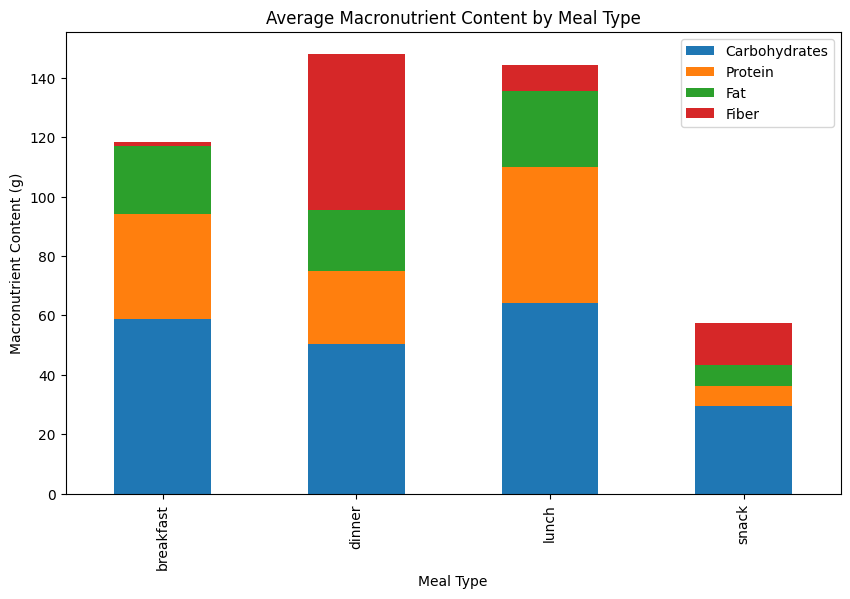

In [ ]:
avg_all_type.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Meal Type")
plt.ylabel("Macronutrient Content (g)")
plt.title("Average Macronutrient Content by Meal Type")
plt.legend(["Carbohydrates", "Protein", "Fat", "Fiber"])
plt.show()

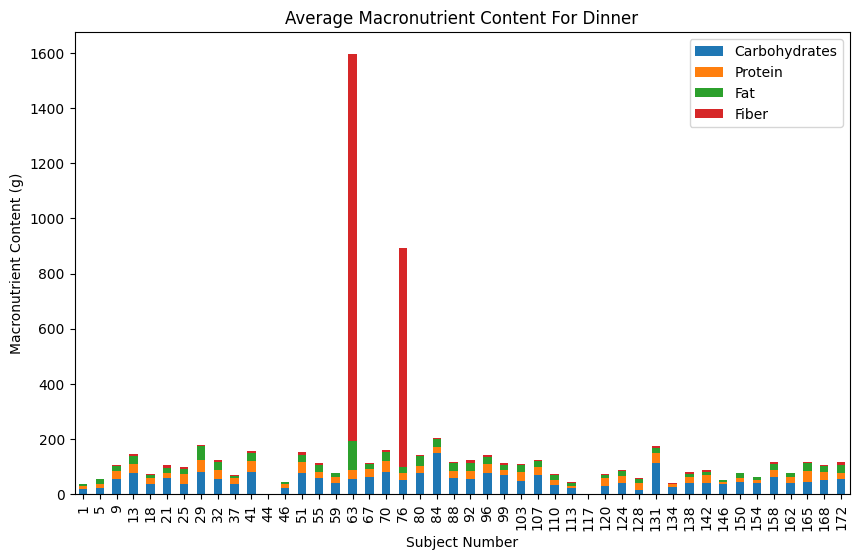

In [ ]:
meal_macros_df[meal_macros_df['Meal Type'] == 'dinner'].plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Subject Number")
plt.ylabel("Macronutrient Content (g)")
plt.title("Average Macronutrient Content For Dinner")
plt.legend(["Carbohydrates", "Protein", "Fat", "Fiber"])
plt.show()

In [ ]:
participant_data

{'001':        Unnamed: 0            Timestamp   Libre GL  Dexcom GL    HR  \
 0               0  2020-05-01 10:30:00  84.000000        NaN  56.0   
 1               1  2020-05-01 10:31:00  84.133333        NaN  56.0   
 2               2  2020-05-01 10:32:00  84.266667        NaN  57.0   
 3               3  2020-05-01 10:33:00  84.400000        NaN  54.0   
 4               4  2020-05-01 10:34:00  84.533333        NaN  55.0   
 ...           ...                  ...        ...        ...   ...   
 14725       14725  2020-05-11 15:55:00  81.666667        NaN  78.0   
 14726       14726  2020-05-11 15:56:00  81.733333        NaN  79.0   
 14727       14727  2020-05-11 15:57:00  81.800000        NaN  80.0   
 14728       14728  2020-05-11 15:58:00  81.866667        NaN  81.0   
 14729       14729  2020-05-11 15:59:00  81.933333        NaN  83.0   
 
        Calories (Activity)  METs Meal Type  Calories  Carbs  Protein  Fat  \
 0                  1.04840  10.0       NaN       NaN    NaN 

In [ ]:
participant_data['001'].groupby(['Meal Type']).count()

,Unnamed: 0,Timestamp,Libre GL,Dexcom GL,HR,Calories (Activity),METs,Calories,Carbs,Protein,Fat,Fiber,Amount Consumed,Image path
Meal Type,,,,,,,,,,,,,,
Breakfast,10,10,10,9,10,10,10,10,10,10,10,10,10,10
Dinner,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Lunch,10,10,10,10,10,10,10,10,10,10,10,9,10,10
Snacks,9,9,9,9,9,9,9,9,9,9,9,9,9,8


In [ ]:
meal_macros_df

,Meal Type,Carbs,Protein,Fat,Fiber
0,breakfast,59.000000,35.200000,23.100000,1.400000
1,dinner,19.000000,8.692857,7.285714,0.785714
2,lunch,66.800000,45.700000,28.220000,7.000000
3,snack,21.111111,1.433333,1.444444,0.000000
4,breakfast,59.000000,35.200000,23.100000,1.400000
...,...,...,...,...,...
169,lunch,64.800000,46.100000,25.800000,8.700000
170,snack,29.250000,6.750000,11.250000,2.250000
171,breakfast,59.000000,35.200000,23.100000,1.400000
172,dinner,55.500000,21.500000,28.250000,10.625000


In [ ]:

# Combine all participant data into one DataFrame
all_meal_data = []

required_columns = {"Timestamp","Meal Type", "Carbs", "Protein", "Fat", "Fiber"}



for pid, df in participant_data.items():
    if required_columns.issubset(df.columns):
        # Remove rows where meal_type is NaN
        temp = df.dropna(subset=["Meal Type"])
        
        # Append filtered data
        all_meal_data.append(temp[["Timestamp","Meal Type", "Carbs", "Protein", "Fat", "Fiber"]])


In [ ]:
participant_data['001'].iloc[233]

Unnamed: 0                                                    233
Timestamp                                     2020-05-01 14:23:00
Libre GL                                                     69.8
Dexcom GL                                                   109.4
HR                                                           95.0
Calories (Activity)                                       4.61296
METs                                                         44.0
Meal Type                                                   Lunch
Calories                                                   1170.0
Carbs                                                        85.0
Protein                                                      88.0
Fat                                                          54.2
Fiber                                                        12.0
Amount Consumed                                             100.0
Image path             photos/00000005-PHOTO-2020-5-1-14-23-0.jpg
Name: 233,

In [ ]:
if all_meal_data:
    meal_time_df = pd.concat(all_meal_data).reset_index(drop=True)

In [ ]:
meal_time_df

,Timestamp,Meal Type,Carbs,Protein,Fat,Fiber
233,2020-05-01 14:23:00,Lunch,85.0,88.0,54.2,12.0
618,2020-05-01 20:48:00,Dinner,18.0,0.0,0.0,0.0
825,2020-05-02 00:15:00,Snacks,24.0,0.0,2.0,0.0
1308,2020-05-02 08:18:00,Breakfast,66.0,22.0,10.5,0.0
1530,2020-05-02 12:00:00,Lunch,89.0,17.0,42.0,3.0
...,...,...,...,...,...,...
11804,2025-05-19 13:37:00,lunch,43.0,20.0,20.0,13.0
12208,2025-05-19 20:21:00,dinner,38.0,26.0,12.0,2.0
12853,2025-05-20 07:06:00,breakfast,24.0,22.0,10.5,0.0
13200,2025-05-20 12:53:00,lunch,94.0,44.0,20.0,4.0


In [ ]:
meal_time_df['Meal Type'].dropna()

0           Lunch
1          Dinner
2          Snacks
3       Breakfast
4           Lunch
          ...    
1701        lunch
1702       dinner
1703    breakfast
1704        lunch
1705    breakfast
Name: Meal Type, Length: 1706, dtype: object

In [192]:
import os
import re
# I want to concat all the CGMacros-data together with an extra column for the participant's PID 


dfs = []
# loop over the files in the cleaned_data folder
for file in os.listdir('../cleaned_data'):
    if file.endswith('.csv') and file != 'bio.csv' and file != 'gut_health.csv' and file != 'all_data.csv':
        data = pd.read_csv(f'../cleaned_data/{file}')
        # find PID from the file name
        
        pid = int(re.sub(r'\D', '', file))
        # add the PID to the data   
        data['PID'] = pid
        dfs.append(data)

# concat all the dataframes together
all_data = pd.concat(dfs)


In [193]:
all_data.head()

,Timestamp,Libre GL,HR,Calories (Activity),METs,Meal Type,Calories,Carbs,Protein,Fat,Fiber,Amount Consumed,PID,Amount Consumed,Steps,RecordIndex,Intensity,Sugar
0,0 days 00:00:00,84.000000,56.0,1.0484,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,0 days 00:01:00,84.133333,56.0,1.0484,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2,0 days 00:02:00,84.266667,57.0,1.0484,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,0 days 00:03:00,84.400000,54.0,1.0484,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4,0 days 00:04:00,84.533333,55.0,1.0484,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [194]:
meal_data = all_data[all_data['Meal Type'].notnull()]
meal_data.head()

,Timestamp,Libre GL,HR,Calories (Activity),METs,Meal Type,Calories,Carbs,Protein,Fat,Fiber,Amount Consumed,PID,Amount Consumed,Steps,RecordIndex,Intensity,Sugar
233,0 days 03:53:00,69.8,95.0,4.61296,44.0,lunch,1170.0,85.0,88.0,54.2,12.0,100.0,1,NaN,NaN,NaN,NaN,NaN
618,0 days 10:18:00,84.8,81.0,1.36292,13.0,dinner,80.0,18.0,0.0,0.0,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
825,0 days 13:45:00,81.0,78.0,4.40328,42.0,snack,110.0,24.0,0.0,2.0,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
1308,0 days 21:48:00,88.4,81.0,3.14520,30.0,breakfast,448.0,66.0,22.0,10.5,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
1530,1 days 01:30:00,82.0,84.0,2.93552,28.0,lunch,840.0,89.0,17.0,42.0,3.0,100.0,1,NaN,NaN,NaN,NaN,NaN


In [195]:
subject1 = all_data[all_data['PID'] == 1]
meal1 = meal_data[meal_data['PID'] == 1]

In [196]:
subject1

,Timestamp,Libre GL,HR,Calories (Activity),METs,Meal Type,Calories,Carbs,Protein,Fat,Fiber,Amount Consumed,PID,Amount Consumed,Steps,RecordIndex,Intensity,Sugar
0,0 days 00:00:00,84.000000,56.0,1.04840,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,0 days 00:01:00,84.133333,56.0,1.04840,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2,0 days 00:02:00,84.266667,57.0,1.04840,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,0 days 00:03:00,84.400000,54.0,1.04840,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4,0 days 00:04:00,84.533333,55.0,1.04840,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14725,10 days 05:25:00,81.666667,78.0,2.93552,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
14726,10 days 05:26:00,81.733333,79.0,3.14520,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
14727,10 days 05:27:00,81.800000,80.0,3.56456,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
14728,10 days 05:28:00,81.866667,81.0,3.56456,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [197]:
meal1

,Timestamp,Libre GL,HR,Calories (Activity),METs,Meal Type,Calories,Carbs,Protein,Fat,Fiber,Amount Consumed,PID,Amount Consumed,Steps,RecordIndex,Intensity,Sugar
233,0 days 03:53:00,69.800000,95.0,4.61296,44.0,lunch,1170.0,85.0,88.0,54.2,12.0,100.0,1,NaN,NaN,NaN,NaN,NaN
618,0 days 10:18:00,84.800000,81.0,1.36292,13.0,dinner,80.0,18.0,0.0,0.0,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
825,0 days 13:45:00,81.000000,78.0,4.40328,42.0,snack,110.0,24.0,0.0,2.0,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
1308,0 days 21:48:00,88.400000,81.0,3.14520,30.0,breakfast,448.0,66.0,22.0,10.5,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
1530,1 days 01:30:00,82.000000,84.0,2.93552,28.0,lunch,840.0,89.0,17.0,42.0,3.0,100.0,1,NaN,NaN,NaN,NaN,NaN
1807,1 days 06:07:00,95.133333,81.0,2.93552,28.0,snack,38.0,9.0,0.0,0.0,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
2002,1 days 09:22:00,94.266667,88.0,3.56456,34.0,dinner,330.0,32.0,4.0,22.0,4.0,100.0,1,NaN,NaN,NaN,NaN,NaN
2253,1 days 13:33:00,90.400000,81.0,1.36292,13.0,snack,160.0,29.0,2.0,4.0,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
2797,1 days 22:37:00,86.266667,93.0,1.57260,15.0,breakfast,608.0,66.0,66.0,10.5,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
3141,2 days 04:21:00,79.000000,96.0,2.72584,26.0,lunch,615.0,26.0,67.0,30.0,3.0,100.0,1,NaN,NaN,NaN,NaN,NaN


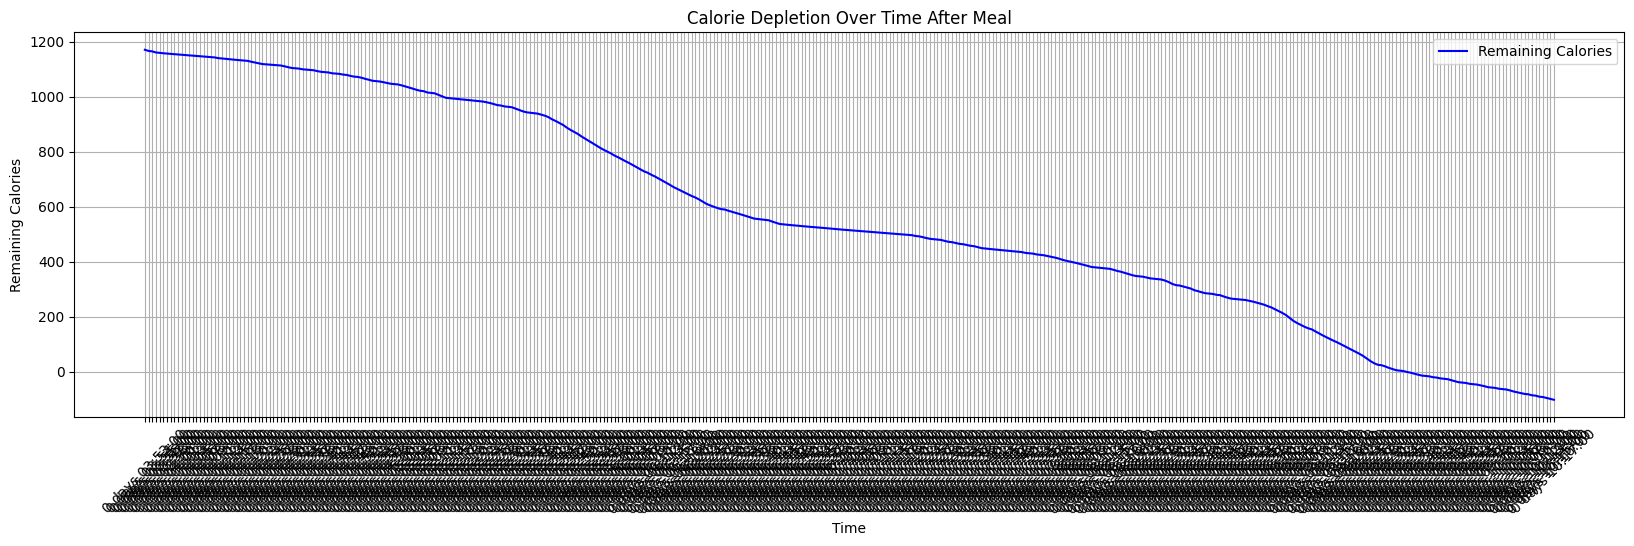

In [203]:
start = meal1.index[0]
initial_cal = meal1.iloc[0]['Calories']
initial_time = meal1.iloc[0]['Timestamp']
end = meal1.index[1]


cal = []
cal.append(initial_cal)
time = []
time.append(initial_time)
for i in range(start+1, end):
    cal.append(cal[-1] - subject1.iloc[i]['Calories (Activity)'])
    time.append( subject1.iloc[i]['Timestamp'] )



# Plot the calorie depletion curve over time
plt.figure(figsize=(20, 5))
plt.plot(time, cal, label="Remaining Calories", color="blue")

plt.xlabel("Time")
plt.ylabel("Remaining Calories")
plt.title("Calorie Depletion Over Time After Meal")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [204]:
subject1.iloc[start+1]

Timestamp              0 days 03:54:00
Libre GL                          69.4
HR                               100.0
Calories (Activity)             4.1936
METs                              40.0
Meal Type                          NaN
Calories                           NaN
Carbs                              NaN
Protein                            NaN
Fat                                NaN
Fiber                              NaN
Amount Consumed                    NaN
PID                                  1
Amount Consumed                    NaN
Steps                              NaN
RecordIndex                        NaN
Intensity                          NaN
Sugar                              NaN
Name: 234, dtype: object

In [205]:
subject1.iloc[start+1]['Calories (Activity)']

np.float64(4.19360017776489)

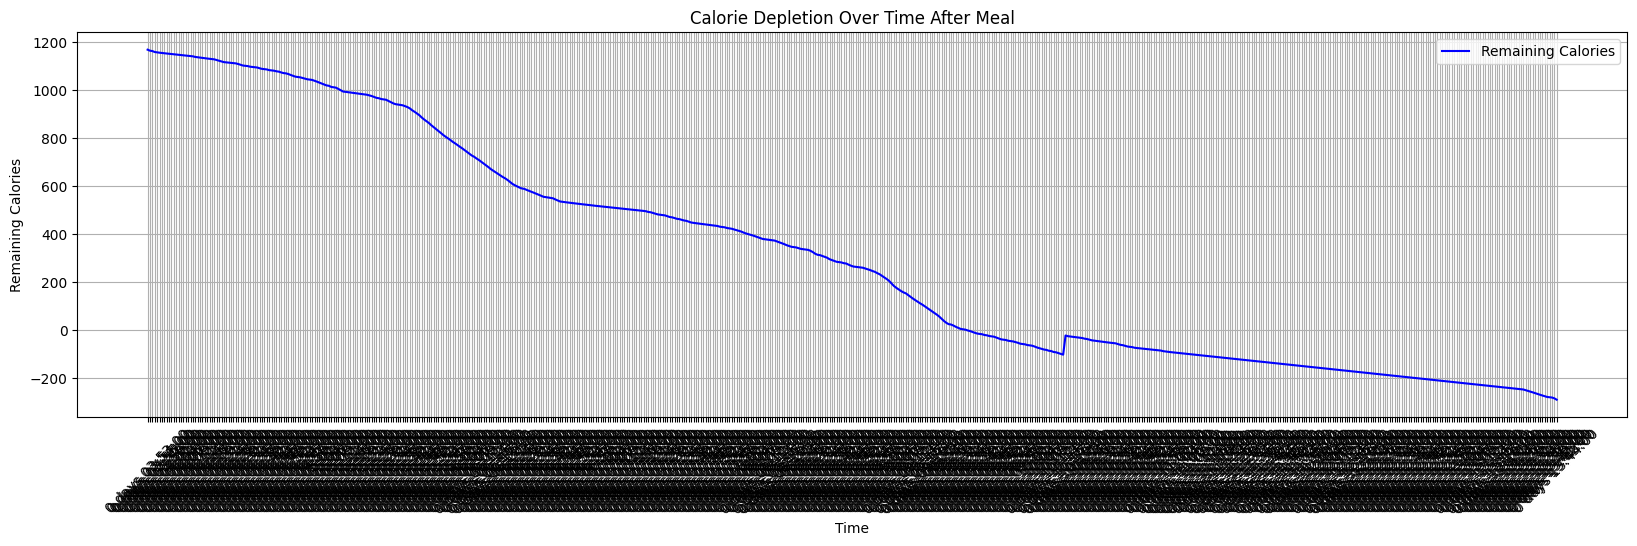

In [206]:
start = meal1.index[1]
initial_cal = meal1.iloc[1]['Calories']
initial_time = meal1.iloc[1]['Timestamp']
end = meal1.index[2]

current_cal = cal[-1] + initial_cal
cal.append(current_cal)
time.append(initial_time)
for i in range(start+1, end):
    cal.append(cal[-1] - subject1.iloc[i]['Calories (Activity)'])
    time.append( subject1.iloc[i]['Timestamp'] )



# Plot the calorie depletion curve over time
plt.figure(figsize=(20, 5))
plt.plot(time, cal, label="Remaining Calories", color="blue")

plt.xlabel("Time")
plt.ylabel("Remaining Calories")
plt.title("Calorie Depletion Over Time After Meal")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [227]:
subject1['Timestamp'] = pd.to_timedelta(subject1["Timestamp"])

C:\Users\lincc\AppData\Local\Temp\ipykernel_3676\2841193593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject1['Timestamp'] = pd.to_timedelta(subject1["Timestamp"])
